In [1]:
# setup
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import MyFunctions as f

In [2]:
# empty dataset to store the resutls
resultsSVM = pd.DataFrame(columns=["model_id", "cost", "f1_score", "presicion", "recall"])

In [3]:
# import pre-processed test ser
test = pd.read_csv("data/test_set_preprocessed.csv")
y_test = test["class"].values
X_test = test.drop("class", axis=1)


Total cost: 113960

F1 score 0.447
Precision:  0.507
Recall 0.4

False positives:  146
False negatives:  225

Confusion matrix, without normalization


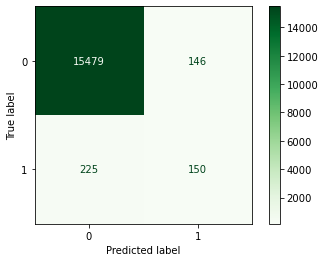

     Normalized confusion matrix


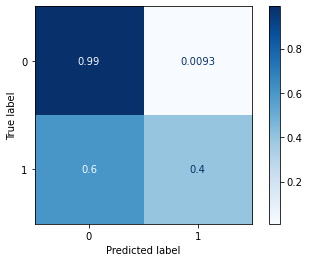

In [4]:
# Baseline model: No sampling technique, no hyperparameter tunning

# import the relevant train set
train = pd.read_csv("train_after_resample/No resampling.csv")
y_train = train["class"].values
X_train = train.drop("class", axis=1)

# train, predict and evaluate
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print()
cost, f1s, pres, recall = f.evaluation_metrics(y_pred, y_test, X_test, clf, 10, 500, "Baseline SVM")

new_row = {"model_id": "Baseline SVM", "cost": cost, "f1_score": f1s, "presicion": pres, "recall":recall}
resultsSVM = resultsSVM.append(new_row, ignore_index=True)

In [5]:
# parameters grid
parameters_grid = {"kernel": ["poly", "rbf"]}

Sampling Technique: Border Line SMOTE 1
Classification algorithm: SVM
Scoring: roc_auc
Best parameters set found on development set:
{'kernel': 'rbf'}

Model evaluation

Total cost: 89870

F1 score 0.402
Precision:  0.318
Recall 0.544

False positives:  437
False negatives:  171

Confusion matrix, without normalization


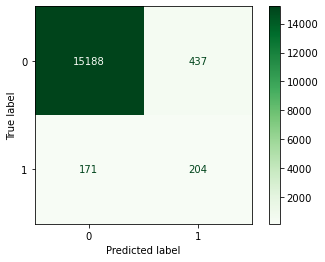

     Normalized confusion matrix


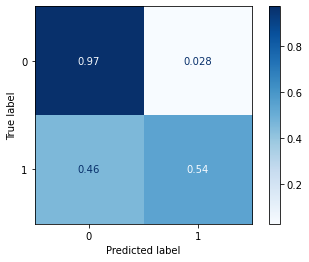

Sampling Technique: Border Line SMOTE 2
Classification algorithm: SVM
Scoring: roc_auc
Best parameters set found on development set:
{'kernel': 'rbf'}

Model evaluation

Total cost: 89720

F1 score 0.39
Precision:  0.303
Recall 0.547

False positives:  472
False negatives:  170

Confusion matrix, without normalization


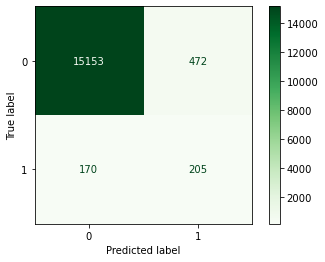

     Normalized confusion matrix


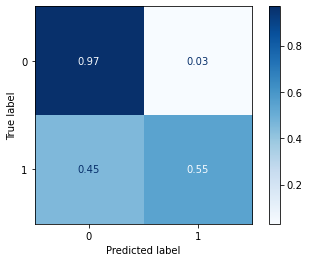

Sampling Technique: Cluster Centroids
Classification algorithm: SVM
Scoring: roc_auc
Best parameters set found on development set:
{'kernel': 'rbf'}

Model evaluation

Total cost: 156250

F1 score 0.046
Precision:  0.023
Recall 1.0

False positives:  15625
False negatives:  0

Confusion matrix, without normalization


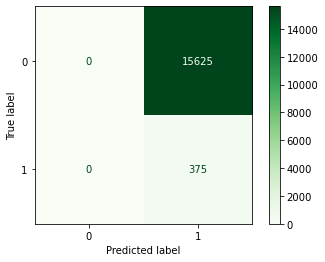

     Normalized confusion matrix


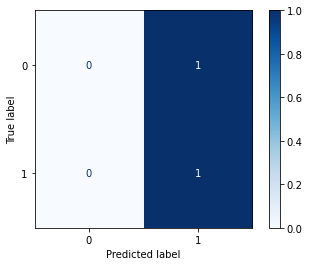

Sampling Technique: k-Means SMOTE
Classification algorithm: SVM
Scoring: roc_auc
Best parameters set found on development set:
{'kernel': 'rbf'}

Model evaluation

Total cost: 146130

F1 score 0.352
Precision:  0.865
Recall 0.221

False positives:  13
False negatives:  292

Confusion matrix, without normalization


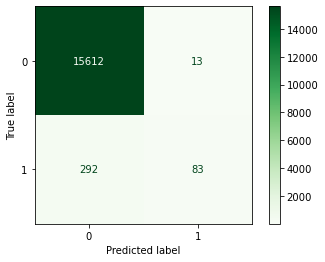

     Normalized confusion matrix


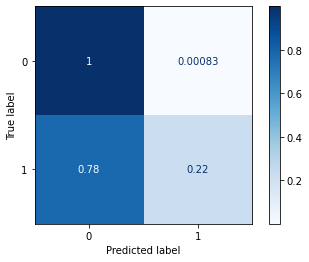

Sampling Technique: NearMiss
Classification algorithm: SVM
Scoring: roc_auc
Best parameters set found on development set:
{'kernel': 'poly'}

Model evaluation

Total cost: 174000

F1 score 0.134
Precision:  1.0
Recall 0.072

False positives:  0
False negatives:  348

Confusion matrix, without normalization


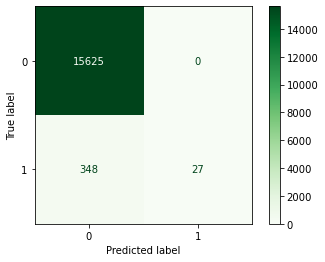

     Normalized confusion matrix


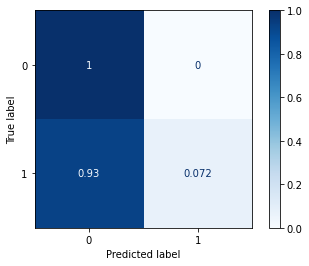

Sampling Technique: No resampling
Classification algorithm: SVM
Scoring: roc_auc


In [ ]:
# train with all sample tecniques, grid search, score: "roc_auc"
for element in os.listdir("train_after_resample"):
    
    model_id = "SVM_"+element[0:-4]+"_roc_auc"

    print("\033[1m"+"Sampling Technique:"+"\033[0m", element[0:-4])
    print("\033[1m"+"Classification algorithm:"+"\033[0m", "SVM")
    print("\033[1m"+"Scoring:"+"\033[0m", "roc_auc")
    
    # import the smapled training set
    sampled_train = pd.read_csv("train_after_resample/"+element)
    y_sam_train = sampled_train["class"].values
    X_sam_train = sampled_train.drop("class", axis=1)
    
    # set classifier
    svm =  SVC(class_weight = "balanced")
    clf = GridSearchCV(estimator=svm, param_grid=parameters_grid, scoring="roc_auc", n_jobs=-1, refit=True, error_score=0)
    
    # fit
    clf.fit(X_sam_train, y_sam_train)
    
    # predict
    y_pred = clf.predict(X_test)
    
    # show best parameters (used in final training)
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print()
    
    # evaluate
    print("\033[1m"+"Model evaluation"+"\033[0m")
    print()
    cost, f1s, pres, recall = f.evaluation_metrics(y_pred, y_test, X_test, clf, 10, 500, model_id)
    
    # save evaluation metrics in dataframe
    new_row = {"model_id": model_id, "cost": cost, "f1_score": f1s, "presicion": pres, "recall":recall}
    resultsSVM = resultsSVM.append(new_row, ignore_index=True)

In [ ]:
resultsSVM.head()

In [ ]:
resultsSVM.to_csv("results/SVM.csv", index=False) 